In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/Carl/Desktop/Prodigy internship/PRODIGY_DS_02/Data/train.csv')


In [3]:
df.shape


(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

CATEGORICAL COLUMNS
1. Survived
2. Pclass
3. Sex
4. Parch (Parent-Child)
5. Embarked
6. SibSp (Sibling / Spouse)

NUMERICAL COLUMNS
1. Age
2. Fare
3. PassengerId

MIXED_DATA COLUMNS
1. Name
2. Ticket
3. Cabin

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# Dropping the cabin column due to large number of missing values
df.drop(columns=['Cabin'], inplace=True)

In [11]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [12]:
df['Embarked'].fillna('S', inplace = True)

In [13]:
df['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [14]:
df['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

CHANGING THE FOLLOWING INTO THEIR APPROPRIATE DATATYPES
1. Survived(Object)
2. Pclass(Object)
3. Sex(Object)
4. Age(int)
5. Embarked(Object)

In [17]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] = df['Sex'].astype('category')
df['Age'] = df['Age'].astype('int64')
df['Embarked'] = df['Embarked'].astype('category')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


In [19]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.544332,0.523008,0.381594,32.204208
std,257.353842,13.013778,1.102743,0.806057,49.693429
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


Out of the 891, 62 percent people died in the tragedy


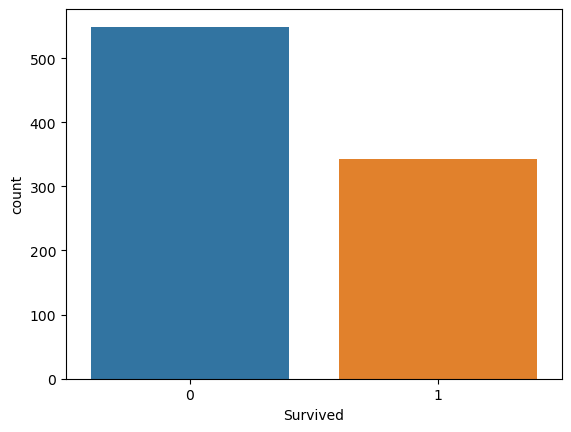

In [34]:
#Univarient analysis on Survived

sns.countplot(data=df, x = 'Survived')

death_count = round((df['Survived'].value_counts().values[0]/891)*100)

#Using f string
print(f'Out of the 891, {death_count} percent people died in the tragedy')

Pclass
3    55.106622
1    24.242424
2    20.650954
Name: count, dtype: float64


<Axes: xlabel='Pclass', ylabel='count'>

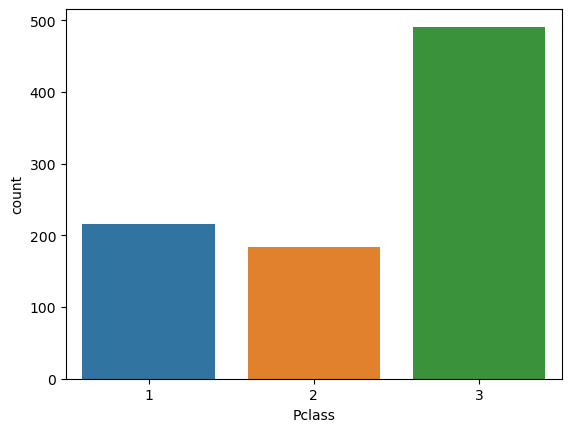

In [35]:
#Pclass column
print((df['Pclass'].value_counts()/ 891)* 100)

sns.countplot(data=df, x = 'Pclass')

Sex
male      64.758698
female    35.241302
Name: count, dtype: float64


<Axes: xlabel='Sex', ylabel='count'>

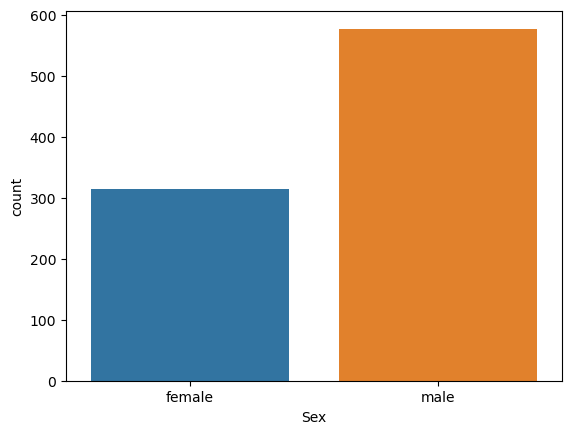

In [36]:
#Sex column
print((df['Sex'].value_counts()/ 891)* 100)

sns.countplot(data=df, x = 'Sex')

Parch
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: count, dtype: float64


<Axes: xlabel='Parch', ylabel='count'>

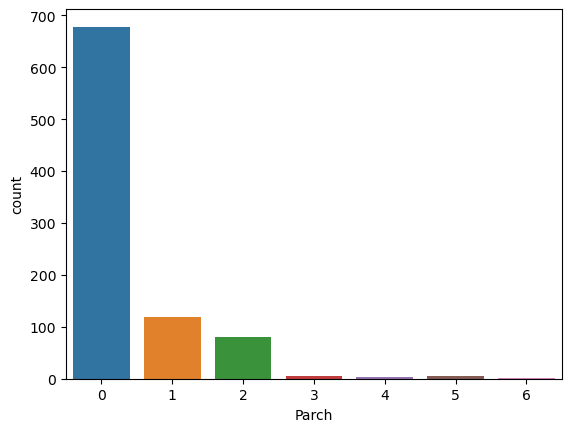

In [37]:
#Parch column
print((df['Parch'].value_counts()/ 891)* 100)

sns.countplot(data=df, x = 'Parch')

Embarked
S    72.502806
C    18.855219
Q     8.641975
Name: count, dtype: float64


<Axes: xlabel='Embarked', ylabel='count'>

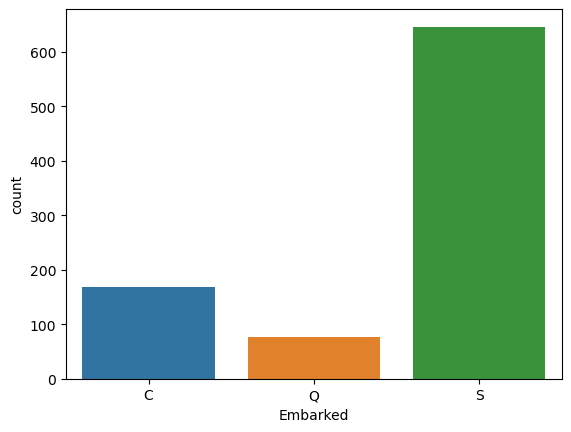

In [47]:
#Embarked column
print((df['Embarked'].value_counts()/ 891)* 100)

sns.countplot(data=df, x = 'Embarked')

0.45956263424701577
0.9865867453652877


C:\Users\Carl\AppData\Local\Temp\ipykernel_3924\3357916469.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


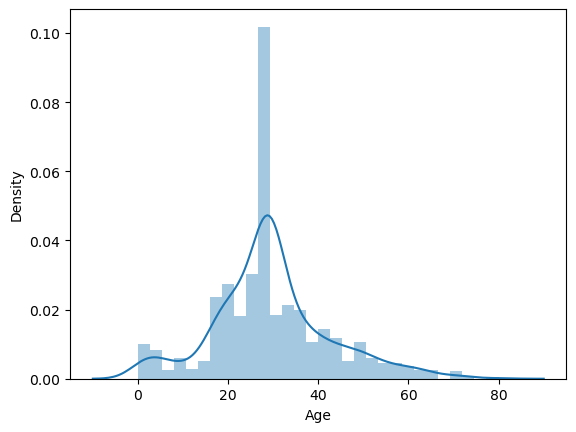

In [42]:
# Age column 

sns.distplot(df['Age'])

print(df['Age'].skew())
print(df['Age'].kurt())

{'whiskers': [<matplotlib.lines.Line2D at 0x1f68d998fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1f68d99a390>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f68d998890>],
 'medians': [<matplotlib.lines.Line2D at 0x1f68d99b390>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f68d99bc10>],
 'means': []}

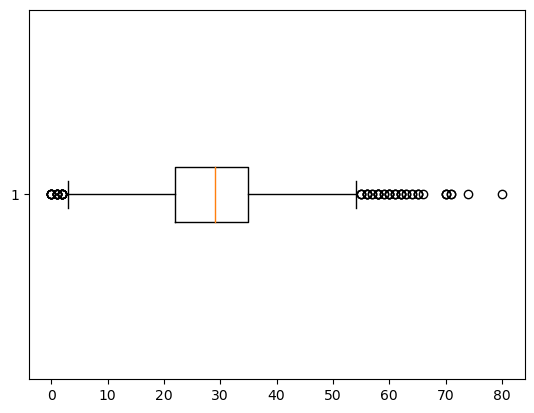

In [46]:
plt.boxplot(df['Age'], vert=False)

4.787316519674893
33.39814088089868


c:\Users\Carl\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


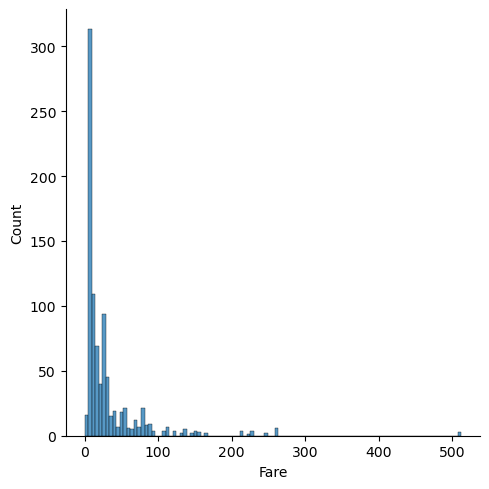

In [48]:
sns.displot(df['Fare'])

print(df['Fare'].skew())
print(df['Fare'].kurt())

<Axes: >

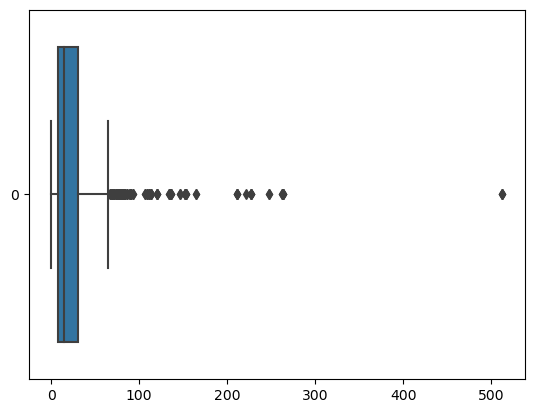

In [53]:
sns.boxplot(df['Fare'], orient='h')

In [56]:
#Checking the definite values for the outliers show in the boc
# People with fare in between $200 and $300
print('People with a fare 200 < x < 300 :', df[(df['Fare'] >200) & (df['Fare'] <300)].shape[0])
print('People with a fare > 300 : ', df[df['Fare'] > 300].shape[0])


People with a fare 200 < x < 300 : 17
People with a fare > 300 :  3


CONCLUSION FROM THE ANALYSIS ABOVE
1. A lot of people had cheaper tickets 
2. Outliers are present in the data

Survived     0     1
Pclass              
1         37.0  63.0
2         52.7  47.3
3         75.8  24.2


<Figure size 1000x600 with 0 Axes>

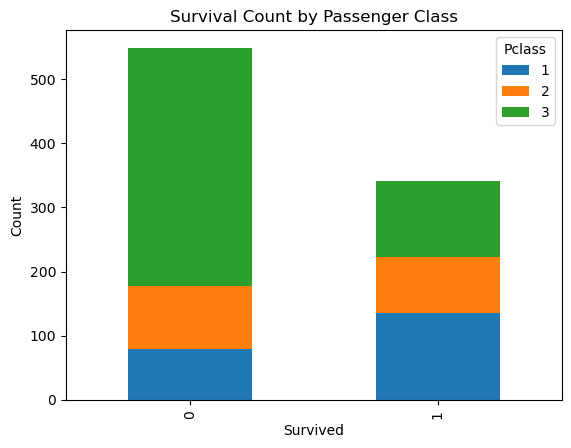

In [66]:
# Multivarient Analysis

crosstab_result = pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r .sum())*100, 1), axis =1)
print(crosstab_result)

#Survived with Pclass
plt.figure(figsize=(10, 6))
df.groupby(['Survived', 'Pclass']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Pclass', loc='upper right')
plt.show()

Survived     0     1
Sex                 
female    25.8  74.2
male      81.1  18.9


<Figure size 1000x600 with 0 Axes>

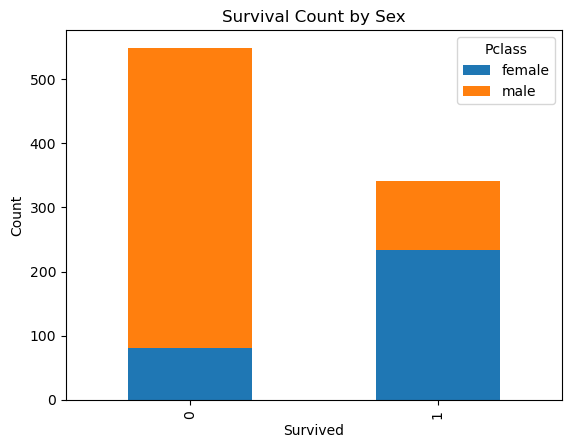

In [68]:
# Survived with Sex
crosstab_result = pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r .sum())*100, 1), axis =1)
print(crosstab_result)

#Survived with Sex
plt.figure(figsize=(10, 6))
df.groupby(['Survived', 'Sex']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Survival Count by Sex')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Pclass', loc='upper right')
plt.show()

Survived     0     1
Embarked            
C         44.6  55.4
Q         61.0  39.0
S         66.1  33.9


<Figure size 1000x600 with 0 Axes>

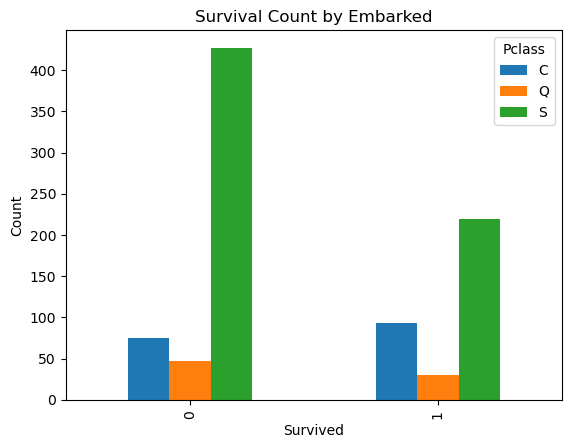

In [69]:
# Survived with Embarked
crosstab_result = pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r .sum())*100, 1), axis =1)
print(crosstab_result)

#Survived with Embarked
plt.figure(figsize=(10, 6))
df.groupby(['Survived', 'Embarked']).size().unstack().plot(kind='bar', stacked=False)
plt.title('Survival Count by Embarked')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.legend(title='Pclass', loc='upper right')
plt.show()

C:\Users\Carl\AppData\Local\Temp\ipykernel_3924\2265592502.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived'] ==0]['Age'])
C:\Users\Carl\AppData\Local\Temp\ipykernel_3924\2265592502.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Survived'] ==1]['Age'])


<Axes: xlabel='Age', ylabel='Density'>

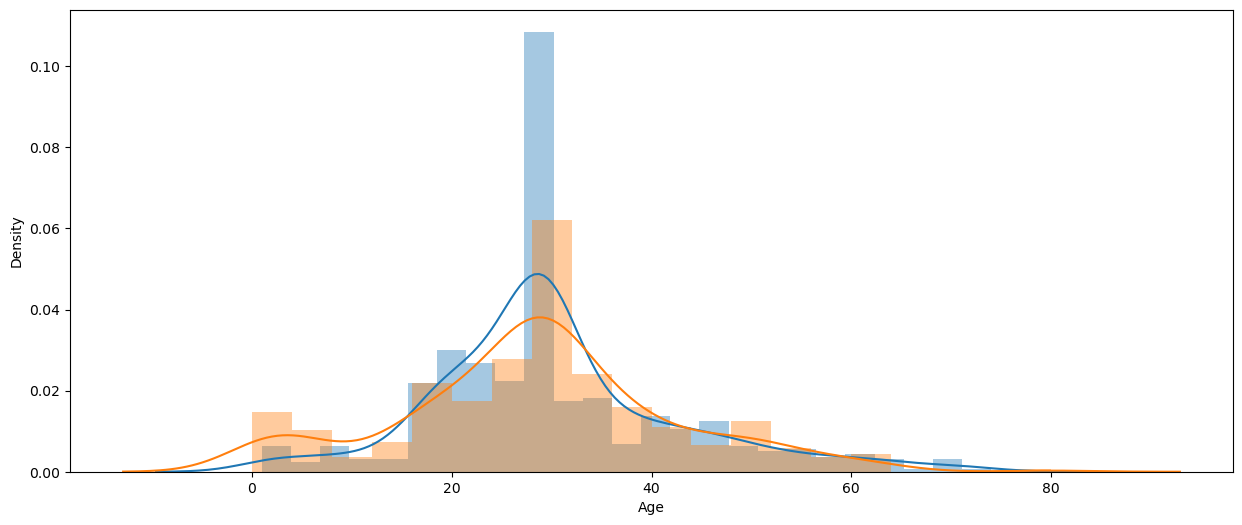

In [72]:
# Survived with Age

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived'] ==0]['Age'])
sns.distplot(df[df['Survived'] ==1]['Age'])


<Axes: xlabel='Fare', ylabel='Count'>

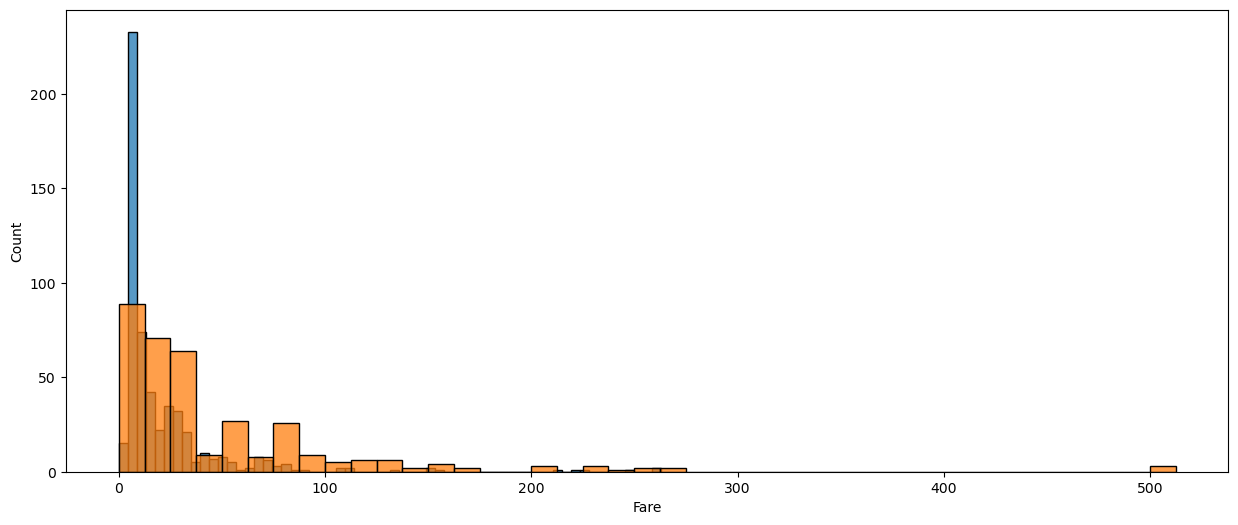

In [76]:
# Survived with Fare

plt.figure(figsize=(15,6))
sns.histplot(df[df['Survived'] ==0]['Fare'])
sns.histplot(df[df['Survived'] ==1]['Fare'])

c:\Users\Carl\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


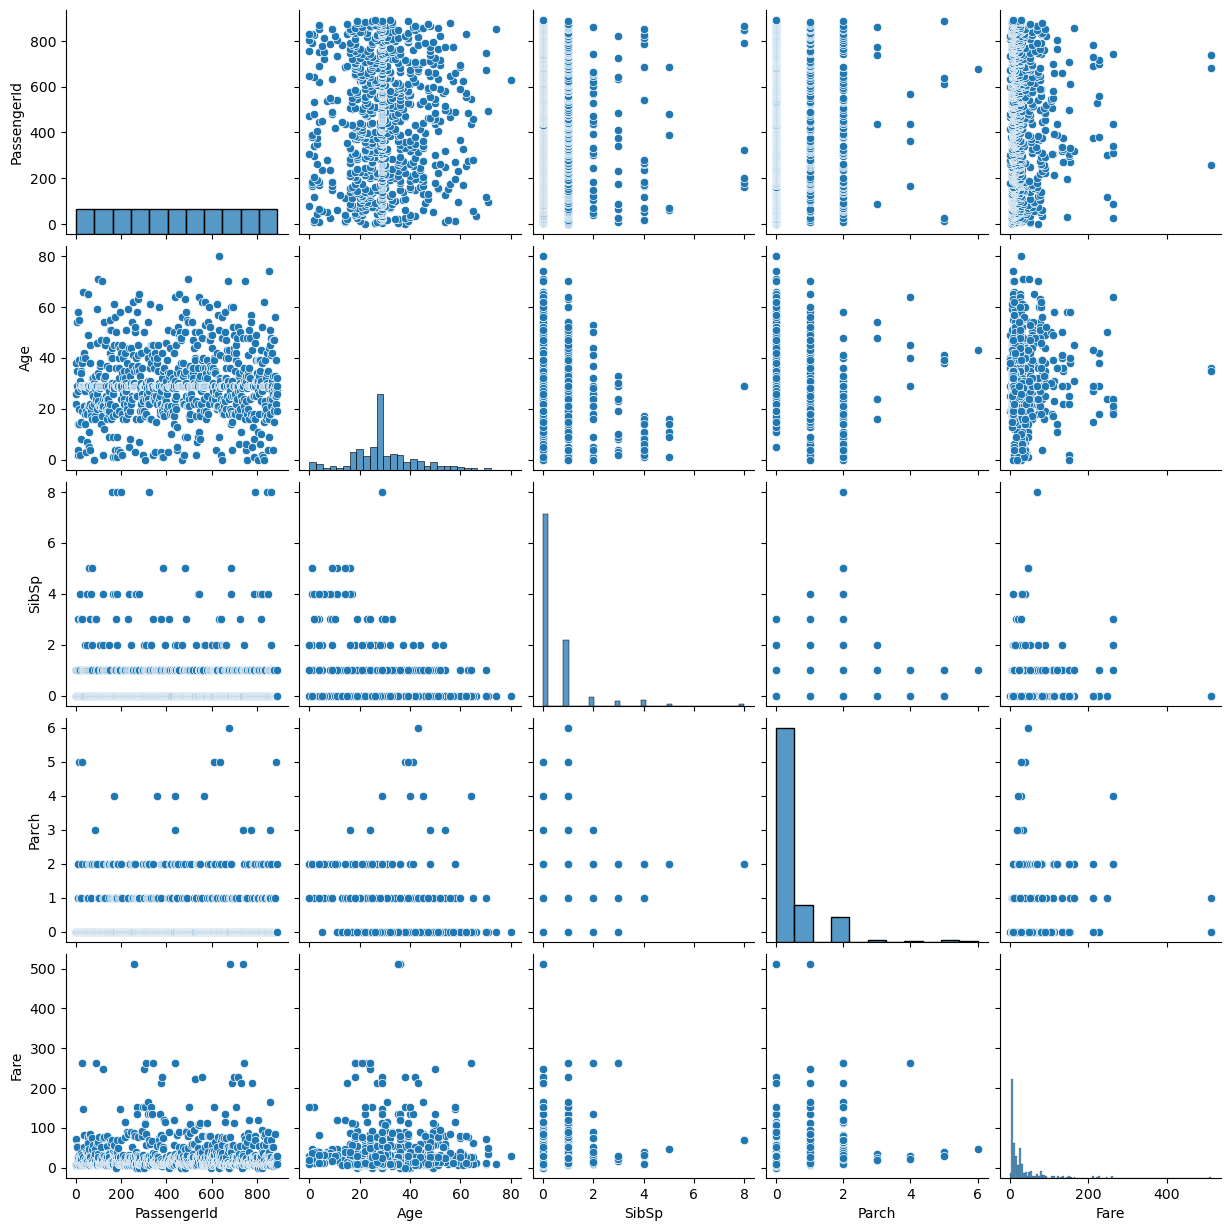

In [77]:
sns.pairplot(df)

<Axes: >

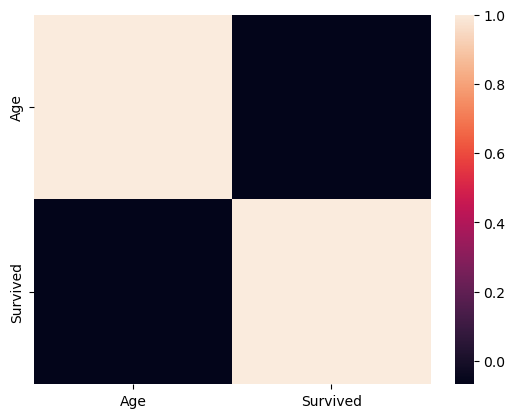

In [80]:
sns.heatmap(df[['Age', 'Survived']].corr())

<Axes: >

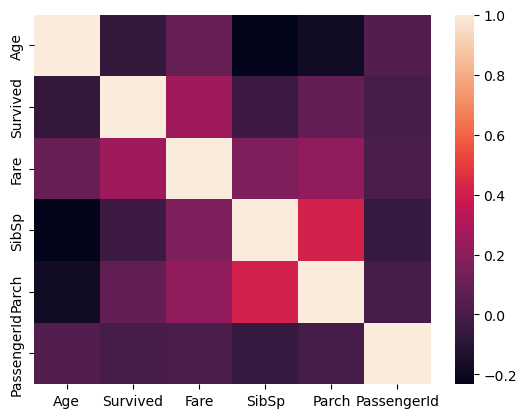

In [82]:
sns.heatmap(df[['Age', 'Survived', 'Fare', 'SibSp', 'Parch', 'PassengerId']].corr())

In [84]:
# Creating new column being the size if the family
df['Family_Size'] = df['SibSp'] + df['Parch']

In [86]:
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size
77,78,0,3,"Moutal, Mr. Rahamin Haim",male,29,0,0,374746,8.0500,S,0
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10,3,2,347088,27.9000,S,5
538,539,0,3,"Risien, Mr. Samuel Beard",male,29,0,0,364498,14.5000,S,0
452,453,0,1,"Foreman, Mr. Benjamin Laventall",male,30,0,0,113051,27.7500,C,0
433,434,0,3,"Kallio, Mr. Nikolai Erland",male,17,0,0,STON/O 2. 3101274,7.1250,S,0
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32,0,0,SOTON/O.Q. 392078,8.0500,S,0
544,545,0,1,"Douglas, Mr. Walter Donald",male,50,1,0,PC 17761,106.4250,C,1
136,137,1,1,"Newsom, Miss. Helen Monypeny",female,19,0,2,11752,26.2833,S,2
836,837,0,3,"Pasic, Mr. Jakob",male,21,0,0,315097,8.6625,S,0
84,85,1,2,"Ilett, Miss. Bertha",female,17,0,0,SO/C 14885,10.5000,S,0


In [87]:
#New column which categorize the size of the family into large,medium and small
def family_type(number):
    if number ==0:
        return 'Alone'
    if number >0 and number <=4:
        return 'Medium'
    else: 
        return 'Large'

In [89]:
df['Family_type'] = df['Family_Size'].apply(family_type)
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Family_type
852,853,0,3,"Boulos, Miss. Nourelain",female,9,1,1,2678,15.2458,C,2,Medium
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20,0,0,7534,9.8458,S,0,Alone
860,861,0,3,"Hansen, Mr. Claus Peter",male,41,2,0,350026,14.1083,S,2,Medium
831,832,1,2,"Richards, Master. George Sibley",male,0,1,1,29106,18.7500,S,2,Medium
790,791,0,3,"Keane, Mr. Andrew ""Andy""",male,29,0,0,12460,7.7500,Q,0,Alone
352,353,0,3,"Elias, Mr. Tannous",male,15,1,1,2695,7.2292,C,2,Medium
881,882,0,3,"Markun, Mr. Johann",male,33,0,0,349257,7.8958,S,0,Alone
380,381,1,1,"Bidois, Miss. Rosalie",female,42,0,0,PC 17757,227.5250,C,0,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,1,Medium
480,481,0,3,"Goodwin, Master. Harold Victor",male,9,5,2,CA 2144,46.9000,S,7,Large


In [92]:
# Now we have the best category of the family description
df.drop(columns=['SibSp', 'Parch', 'Family_Size'], inplace=True)
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_type
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25,SOTON/OQ 392076,7.0500,S,Alone
142,143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24,STON/O2. 3101279,15.8500,S,Medium
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18,PC 17608,262.3750,C,Medium
175,176,0,3,"Klasen, Mr. Klas Albin",male,18,350404,7.8542,S,Medium
789,790,0,1,"Guggenheim, Mr. Benjamin",male,46,PC 17593,79.2000,C,Alone


In [94]:
crosstab_result = pd.crosstab(df['Family_type'], df['Survived']).apply(lambda r: round((r/r .sum())*100, 1), axis =1)
crosstab_result

Survived,0,1
Family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


In [99]:
df = df[df['Age'] < (df['Age'].mean() + 3 * df['Age'].std())]
df.shape

(790, 10)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 790 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  790 non-null    int64   
 1   Survived     790 non-null    category
 2   Pclass       790 non-null    category
 3   Name         790 non-null    object  
 4   Sex          790 non-null    category
 5   Age          790 non-null    int64   
 6   Ticket       790 non-null    object  
 7   Fare         790 non-null    float64 
 8   Embarked     790 non-null    category
 9   Family_type  790 non-null    object  
dtypes: category(4), float64(1), int64(2), object(3)
memory usage: 46.8+ KB


In [101]:
# Removing the outliers in the Fare column
low, high = df['Fare'].quantile([0.1, 0.9])
mask_Fare = df['Fare'].between(low,high)
df = df[mask_Fare]


In [102]:
df.shape

(632, 10)

In [103]:
df.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Family_type
666,667,0,2,"Butler, Mr. Reginald Fenton",male,25,234686,13.0000,S,Alone
646,647,0,3,"Cor, Mr. Liudevit",male,19,349231,7.8958,S,Alone
335,336,0,3,"Denkoff, Mr. Mitto",male,29,349225,7.8958,S,Alone
812,813,0,2,"Slemen, Mr. Richard James",male,35,28206,10.5000,S,Alone


In [105]:
# Coloumns to get dummy/indicator variable transformation

pd.get_dummies(data=df, columns=['Pclass', 'Sex', 'Embarked', 'Family_type'], drop_first=True)
df = pd.get_dummies(data=df, columns=['Pclass', 'Sex', 'Embarked', 'Family_type'], drop_first=True)

In [113]:
# Converting the boolean dummy variable column to integer type
bool_columns = ['Pclass_2', 'Pclass_3', 'Sex_male', 'Embarked_Q', 'Embarked_S', 'Family_type_Large', 'Family_type_Medium']
df[bool_columns] = df[bool_columns].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 632 entries, 1 to 890
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         632 non-null    int64   
 1   Survived            632 non-null    category
 2   Name                632 non-null    object  
 3   Age                 632 non-null    int64   
 4   Ticket              632 non-null    object  
 5   Fare                632 non-null    float64 
 6   Pclass_2            632 non-null    int64   
 7   Pclass_3            632 non-null    int64   
 8   Sex_male            632 non-null    int64   
 9   Embarked_Q          632 non-null    int64   
 10  Embarked_S          632 non-null    int64   
 11  Family_type_Large   632 non-null    int64   
 12  Family_type_Medium  632 non-null    int64   
dtypes: category(1), float64(1), int64(9), object(2)
memory usage: 64.9+ KB


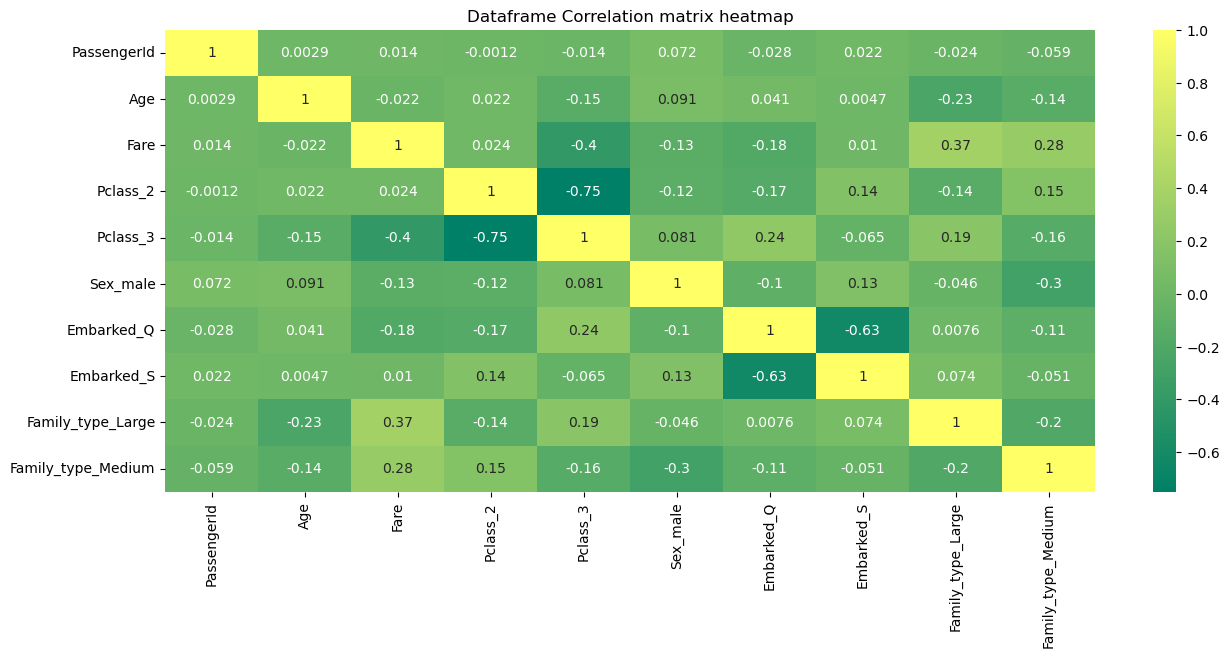

In [114]:
# Select only the numeric columns
numeric_df = df.select_dtypes(include='number')

#Calculating the correlation matrix
corr_matrix = numeric_df.corr()

#Plot the heatmap
plt.figure(figsize=(15,6))
sns.heatmap(corr_matrix, cmap='summer', annot=True)
plt.title("Dataframe Correlation matrix heatmap")
plt.show()

DEDUCTIONS FROM EDA
1. Chances of females surving is higher than the males
2. Travelling in Pclass 3 was most dangerous
3. Also those who paid a higher fare had a higher chance of surviving than those who paid a lower fair
4. Age range from 20 to 40 had low chances of not surviving 
5. People travelling in smalle r families had a higher chance of surviving than thos with bigger families. 